In [3]:
from pycaret.regression  import load_model
from pycaret.regression  import predict_model
from pycaret.regression  import *

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
model46800 = load_model('./MODEL/6800_reg')
model48800 = load_model('./MODEL/8800_reg')
model43000 = load_model('./MODEL/43000_reg')


traffic_data = pd.read_csv('./DATA_RL/year_DATA.csv', encoding='cp949')
cond1 = traffic_data['LINK_ID'] == 46800
cond2 = traffic_data['LINK_ID'] == 48800
cond3 = traffic_data['LINK_ID'] == 43000

traffic_data_46800 = traffic_data[cond1]
traffic_data_48800 = traffic_data[cond2]
traffic_data_43000 = traffic_data[cond3]


traffic_data_46800 = traffic_data_46800.T
traffic_data_48800 = traffic_data_48800.T
traffic_data_43000 = traffic_data_43000.T

traffic_data_46800.columns = ['vol']
traffic_data_46800 = traffic_data_46800[0:]
traffic_data_46800 = traffic_data_46800[1:]

traffic_data_48800.columns = ['vol']
traffic_data_48800 = traffic_data_48800[0:]
traffic_data_48800 = traffic_data_48800[1:]

traffic_data_43000.columns = ['vol']
traffic_data_43000 = traffic_data_43000[0:]
traffic_data_43000 = traffic_data_43000[1:]

speed_df_46800 = pd.read_csv('./data/1070046800_avg.csv')
# Ensure both DataFrames are aligned by index
traffic_data_46800['speed'] = speed_df_46800['speed'].values

speed_df_48800 = pd.read_csv('./data/1070048800_avg.csv')
# Ensure both DataFrames are aligned by index
traffic_data_48800['speed'] = speed_df_48800['speed'].values

speed_df_43000 = pd.read_csv('./data/1070043000_avg.csv')
# Ensure both DataFrames are aligned by index
traffic_data_43000['speed'] = speed_df_43000['speed'].values

model_46800, model_48800, model_43000 = LinearRegression(), LinearRegression(), LinearRegression()


X_train_48800 = traffic_data_48800[['speed']].values
y_train_48800 = traffic_data_48800[['vol']].values
# Fit the model to the training data
model_48800.fit(X_train_48800, y_train_48800)
# Fit linear regression models for both traffic IDs


X_train_46800 = traffic_data_46800[['speed']].values
y_train_46800 = traffic_data_46800[['vol']].values
# Fit the model to the training data
model_46800.fit(X_train_46800, y_train_46800)

X_train_43000 = traffic_data_43000[['speed']].values
y_train_43000 = traffic_data_43000[['vol']].values
# Fit the model to the training data
model_43000.fit(X_train_43000, y_train_43000)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


LinearRegression()

In [2]:
model46800 = load_model('./MODEL/6800_reg')
model48800 = load_model('./MODEL/8800_reg')
model43000 = load_model('./MODEL/43000_reg')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [3]:
import matplotlib.pyplot as plt

In [4]:
car_number_48800_hour_list = []
car_number_43000_hour_list = []
car_number_46800_hour_list=  []
for time_step in range(0,180):
    month = 10
    day = 30

    start_time = pd.Timestamp(f'2024-{month:02d}-{day:02d} 17:00') + pd.Timedelta(seconds=60 * time_step)
    future_dates = pd.DataFrame({'ds': [start_time]})
    future_dates['month'] = future_dates['ds'].dt.month
    future_dates['day'] = future_dates['ds'].dt.day
    future_dates['hour'] = future_dates['ds'].dt.hour
    future_dates['min'] = future_dates['ds'].dt.minute

    df_test = future_dates[['month','day','hour','min']]
    forecast46800_speed = model46800.predict(df_test)
    forecast48800_speed = model48800.predict(df_test)
    forecast43000_speed = model43000.predict(df_test)
    
    car_number_48800_hour_list.append(forecast48800_speed[0])
    car_number_43000_hour_list.append(forecast43000_speed[0])
    car_number_46800_hour_list.append(forecast46800_speed[0])


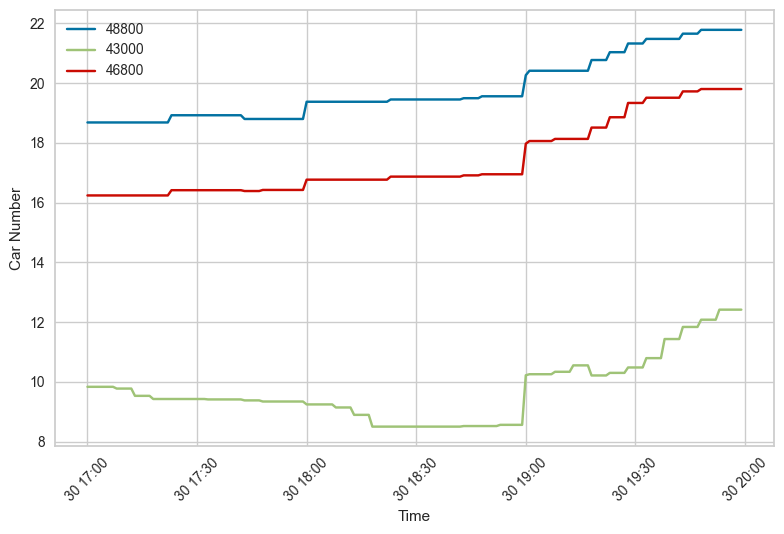

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
month = 10  # example month
day = 30    # example day
intervals = 180  # number of intervals

# Generate timestamps for x-axis labels
timestamps = [pd.Timestamp(f'2024-{month:02d}-{day:02d} 17:00') + pd.Timedelta(seconds=60 * step) for step in range(intervals)]

# Plot data
plt.plot(timestamps, car_number_48800_hour_list, label="48800")
plt.plot(timestamps, car_number_43000_hour_list, label="43000")
plt.plot(timestamps, car_number_46800_hour_list, label="46800")

# Set x-axis labels and legend position
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Car Number")
plt.legend(loc='upper left')  # Legend positioned in the upper left corner
plt.tight_layout()  # Ensures labels fit without overlapping
plt.show()


In [6]:
car_number_48800_hour_list = []
car_number_43000_hour_list = []
car_number_46800_hour_list=  []
for time_step in range(0,180):
    month = 10
    day = 30

    start_time = pd.Timestamp(f'2024-{month:02d}-{day:02d} 06:00') + pd.Timedelta(seconds=60 * time_step)
    future_dates = pd.DataFrame({'ds': [start_time]})
    future_dates['month'] = future_dates['ds'].dt.month
    future_dates['day'] = future_dates['ds'].dt.day
    future_dates['hour'] = future_dates['ds'].dt.hour
    future_dates['min'] = future_dates['ds'].dt.minute

    df_test = future_dates[['month','day','hour','min']]
    
    forecast46800_speed = model46800.predict(df_test)
    forecast48800_speed = model48800.predict(df_test)
    forecast43000_speed = model43000.predict(df_test)

    car_number_48800_hour_list.append(forecast48800_speed[0])
    car_number_43000_hour_list.append(forecast43000_speed[0])
    car_number_46800_hour_list.append(forecast46800_speed[0])


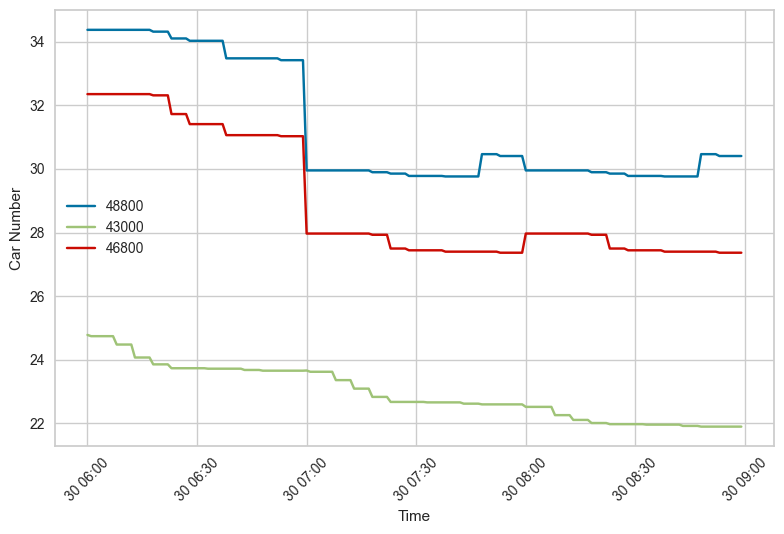

In [9]:
# Define parameters
month = 10  # example month
day = 30    # example day
intervals = 180  # number of intervals

# Generate timestamps for x-axis labels
timestamps = [pd.Timestamp(f'2024-{month:02d}-{day:02d} 06:00') + pd.Timedelta(seconds=60 * step) for step in range(intervals)]

# Plot data
plt.plot(timestamps, car_number_48800_hour_list, label="48800")
plt.plot(timestamps, car_number_43000_hour_list, label="43000")
plt.plot(timestamps, car_number_46800_hour_list, label="46800")

# Set x-axis labels and legend position
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Car Number")
plt.legend(loc='center left')  # Legend positioned in the upper left corner
plt.tight_layout()  # Ensures labels fit without overlapping
plt.show()
